Overview

The Revenue Tree is a hierarchical breakdown of factors contributing to overall revenue, allowing for detailed analysis of sales performance and identification of areas for improvement. It is also know as a KPI tree or sometimes as a driver tree.

In this notebook, we'll look at a quick overview of how to generate a revenue tree.

### Setup

Here we'll create some simulated data to demonstrate the code. You do not need to know this to perform segmentations.

In [ ]:
import pandas as pd

df = pd.read_parquet("../../data/transactions.parquet")
df.head()

transaction_id    transaction_date  customer_id  product_id  \
0            7108 2023-01-12 17:44:29            1          15   
1            7108 2023-01-12 17:44:29            1        1317   
2            4553 2023-02-05 09:31:42            1         509   
3            4553 2023-02-05 09:31:42            1         735   
4            4553 2023-02-05 09:31:42            1        1107   

                               product_name category_0_name  category_0_id  \
0                              Spawn Figure            Toys              1   
1                                 Gone Girl           Books              8   
2                             Ryzen 3 3300X     Electronics              3   
3                Linden Wood Paneled Mirror            Home              5   
4  Pro-V Daily Moisture Renewal Conditioner          Beauty              7   

       category_1_name  category_1_id       brand_name  brand_id  \
0       Action Figures              1   McFarlane Toys         3   
1  Mystery & Thrillers             53  Alfred A. Knopf       264   
2  Computer Components             21              AMD       102   
3           Home Decor             30     Pottery Barn       147   
4            Hair Care             45          Pantene       222   

   unit_quantity  unit_spend  store_id  
0              2       55.98         6  
1              1       10.49         6  
2              3      360.00         4  
3              1      599.00         4  
4              1        4.99         4

Some details about the data

In [ ]:
print(f"Number of unique customers: {df['customer_id'].nunique()}")
print(f"Number of unique transactions: {df['transaction_id'].nunique()}")

Number of unique customers: 4250
Number of unique transactions: 25490


In this simple example we want to compare revenue from the first half of the year with that from the second half to see how revenue changed and which factors drove it.

In [ ]:
from pyretailscience import revenue_tree

p1_index = df["transaction_date"] < "2023-06-01"
p2_index = df["transaction_date"] >= "2023-06-01"

rev_tree = revenue_tree.RevenueTree(
    df=df,
    p1_index=p1_index,
    p2_index=p2_index,
)
rev_tree.df

customers__p1  customers__p2  customers_diff  customers_pct_diff  \
0           3203           3037            -166           -0.051826   

   customers_contrib  transactions__p1  transactions__p2  transactions_diff  \
0      -2.376117e+06             11739             13751               2012   

   transactions_pct_diff    spend__p1  ...  units_per_transaction__p1  \
0               0.171394  41392098.84  ...                   8.784479   

   units_per_transaction__p2  units_per_transaction_diff  \
0                   8.786925                    0.002446   

   units_per_transaction_pct_diff  units_per_transaction_contrib  \
0                        0.000278                   108768.83657   

   price_per_unit__p1  price_per_unit__p2  price_per_unit_diff  \
0          401.393497          394.740357            -6.653141   

   price_per_unit_pct_diff  price_per_unit_contrib  
0                -0.016575           -708397.86371  

[1 rows x 42 columns]

The default view of the KPIs can be difficult to view. Use the `draw_tree` method to visualize the data as a tree.

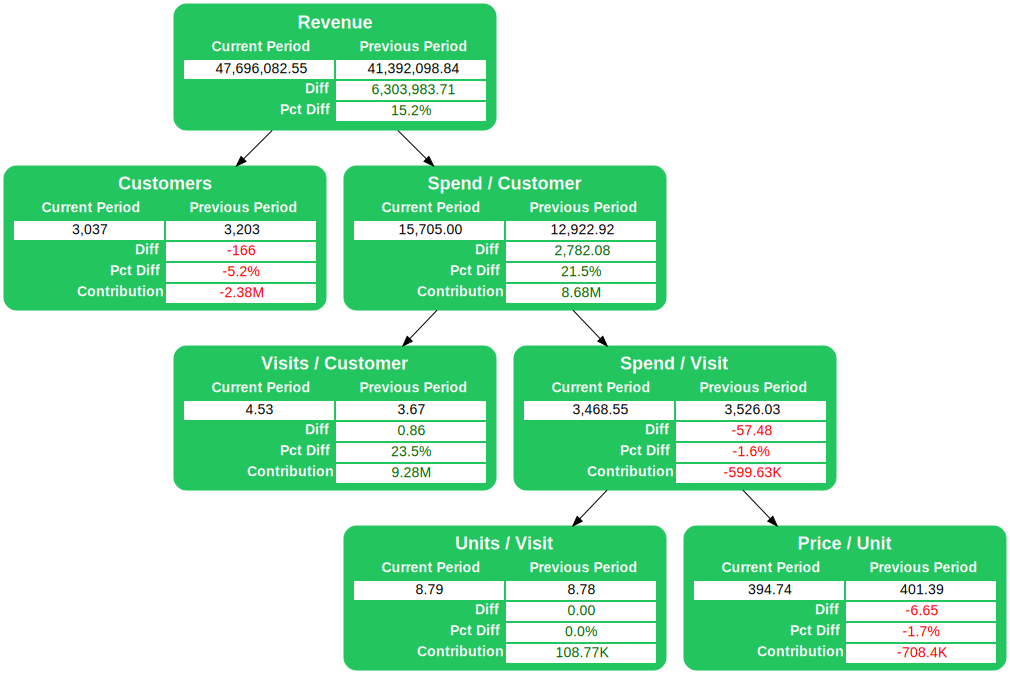

In [ ]:
rev_tree.draw_tree()